<a href="https://colab.research.google.com/github/icaropaiv/ESTUDOS/blob/main/KMEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORT

In [45]:
import numpy               as np
import matplotlib.pyplot   as plt
import pandas              as pd
import seaborn             as sns


from sklearn.datasets      import make_blobs, make_circles, make_moons, make_biclusters
from sklearn.metrics       import confusion_matrix, adjusted_rand_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
def plot_label(data, label, centroids):

    fig, ax = plt.subplots(figsize=(5, 5))
    color_list = plt.rcParams['axes.prop_cycle'].by_key()['color']

    for i, k in enumerate(label):
        ax.scatter(data[i][0],data[i][1], c=color_list[k])

    for point in centroids:
        ax.scatter(*point, marker="x", color="black",s=100, linewidth=2)

    plt.show()

def plot_pairplot(X,y):

    P = X.shape[1]
    df = pd.DataFrame((X))
    df.insert(loc=P,column=P,value=y)

    g = sns.pairplot(df,hue=P, diag_kind="kde", palette='tab10')
    g.map_upper(sns.kdeplot, levels=4, color=".2");

## DATASETS

###  LOAD

In [147]:
K1 = 3
P1 = 2
N1 = 400
data1, label_true1 = make_blobs(centers=K1, n_samples=N1, n_features=P1, shuffle=True, random_state=40)


scaler = StandardScaler()
scaler.fit(data1)
data1 = scaler.transform(data1)

In [148]:
K2 = 4
P2 = 2
N2 = 500
data2, label_true2 = make_blobs(centers=K2, n_samples=N2, n_features=P2,  shuffle=True, random_state=197)


scaler = StandardScaler()
scaler.fit(data2)
data2 = scaler.transform(data2)

In [168]:
K3 = 4
P3 = 3
N3 = 400
data3, label_true3 = make_blobs(centers=K3, n_samples=N3, n_features=P3, shuffle=True, random_state=415)

scaler = StandardScaler()
scaler.fit(data3)
data3 = scaler.transform(data3)

### PLOT

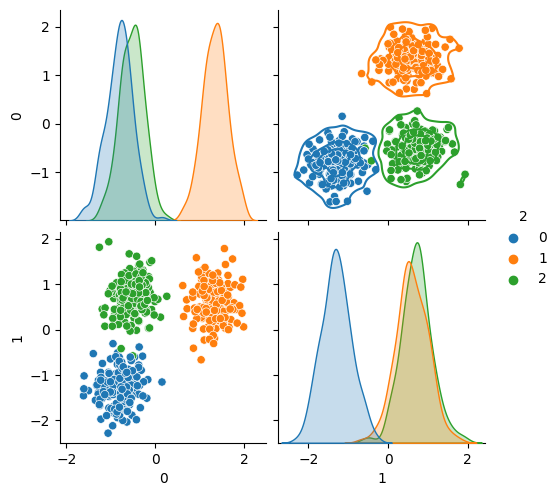

In [85]:
plot_pairplot(data1,label_true1)

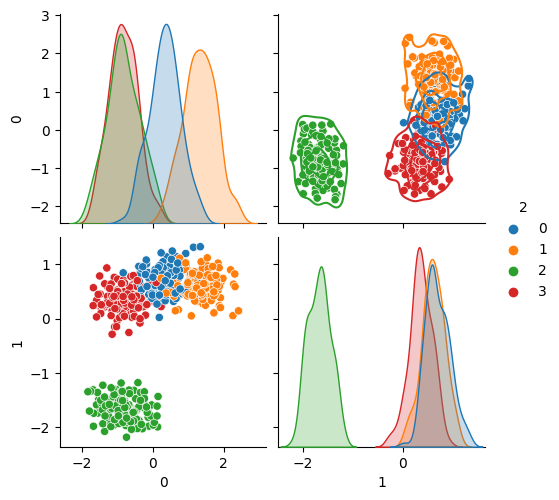

In [140]:
plot_pairplot(data2,label_true2)

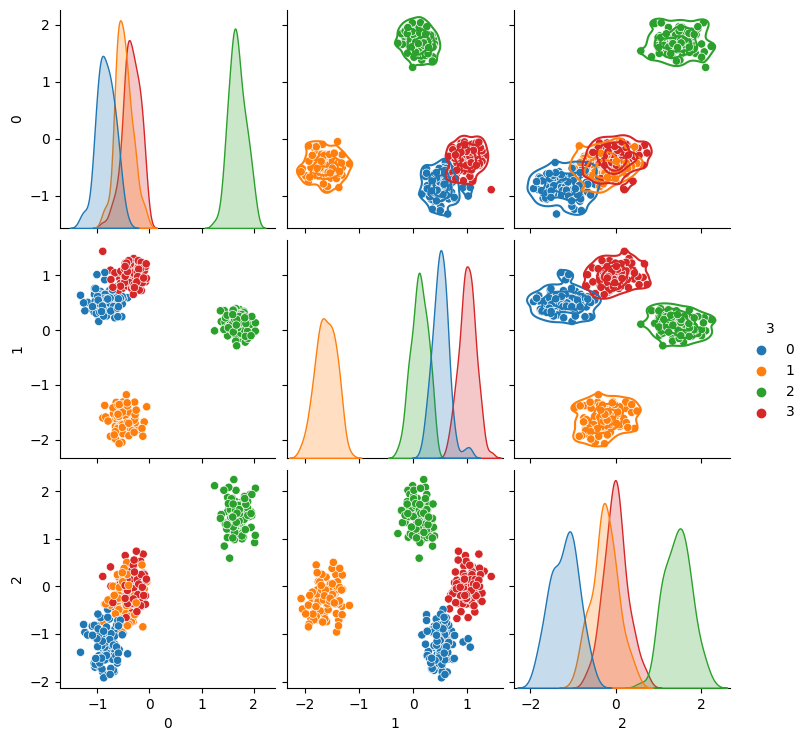

In [144]:
plot_pairplot(data3,label_true3)

## ALGORITHM

In [98]:
########### AUXILIARY FUNCTIONS
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum(np.subtract(x1,x2)**2))

def first_centroid(data, K):

    # np.random.seed(0)
    N, P = data.shape
    random_sample_idxs = np.random.choice(N, K, replace=False)
    centroid = np.array([data[idx] for idx in random_sample_idxs])

    return centroid

def new_centroid(data, label):

    N, P = data.shape
    nk = np.bincount(label)
    K = nk.shape[0]

    centroids = np.zeros((K,P))
    for i, k in enumerate(label):
        centroids[k] += data[i]/nk[k]

    return centroids

def new_label(data, centroids):

    N, P = data.shape
    K = centroids.shape[0]

    dist = np.zeros((K,N))
    for i in range(N):
        for k in range(K):
            dist[k][i] = euclidean_distance(data[i], centroids[k])

    return np.argmin(dist, axis=0)

def cost_function(data, label, centroids):

    total_cost = 0

    for i, k in enumerate(label):
        total_cost += euclidean_distance(data[i], centroids[k])

    return total_cost

def is_converged(label, new_label):

    distances = np.absolute(label - new_label).sum()

    return distances == 0


########### ALGORITHM
def kmeans(data, Ks, iter, plot='no'):

    # (1) Initialization
    centroids = first_centroid(data, Ks)
    labels = new_label(data, centroids)

    costs = []

    for i in range(iter):
        costs.append(cost_function(data, labels, centroids))

        # (2) Definition of the best prototypes
        new_centroids = new_centroid(data, labels)

        # (3) Definition of the best partition
        new_labels = new_label(data, new_centroids)

        if plot == 'yes':
            print(i)
            plot_label(data, labels, centroids)

        # (4) Stopping criterion
        if is_converged(labels, new_labels):
            if plot == 'yes':
                # print(i)
                plot_label(data, labels, centroids)
            return new_labels, costs
            break

        labels = new_labels
        centroids = new_centroids

    return new_labels, costs

def best_kmeans(data, Ks, iter, repet, indica='yes'):

    label, cost = kmeans(data, Ks, iter)

    for j in range(1,repet+1,1):

        new_label, new_cost = kmeans(data, Ks, iter)

        if cost[-1] > new_cost[-1]:
            label = new_label
            cost = new_cost

        if j%10 == 0:
            if indica == 'yes':
                print('      ', j)

    return label

## MODEL

### DATA 1

0


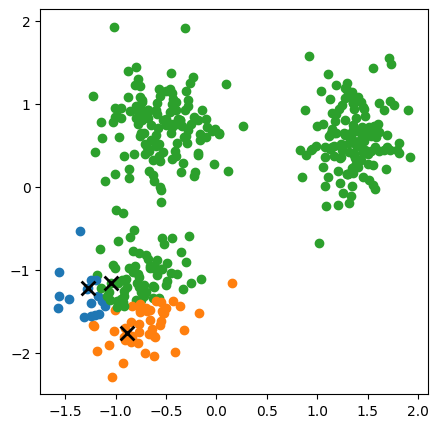

1


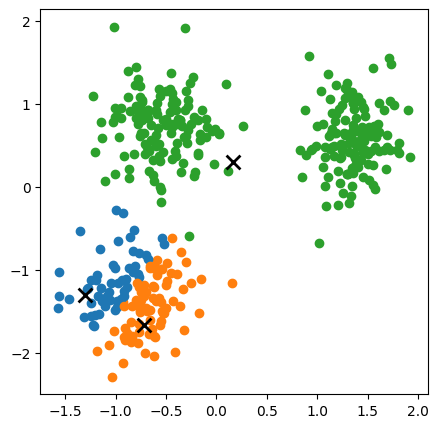

2


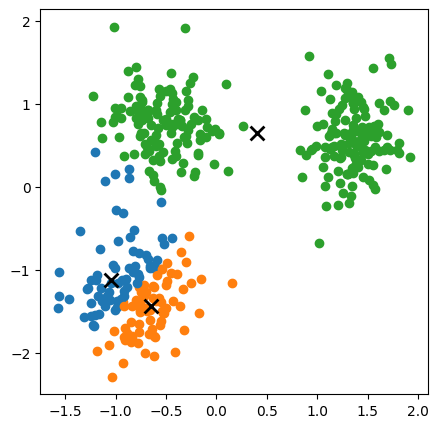

3


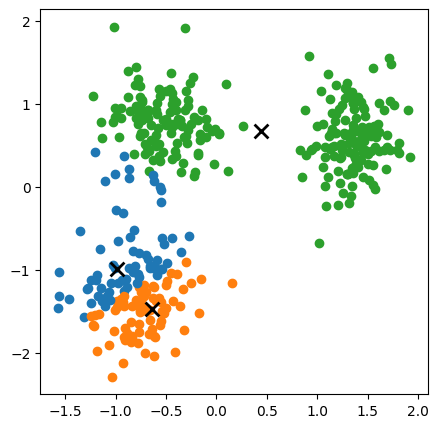

4


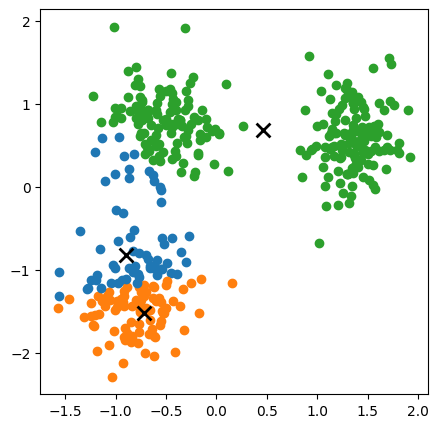

5


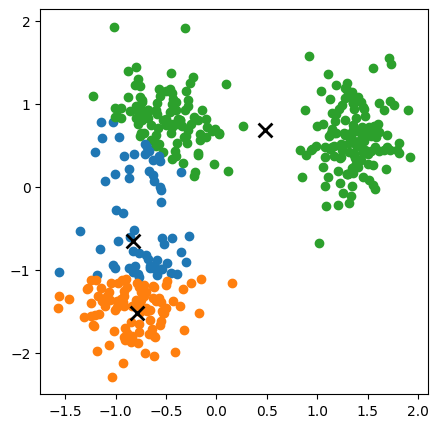

6


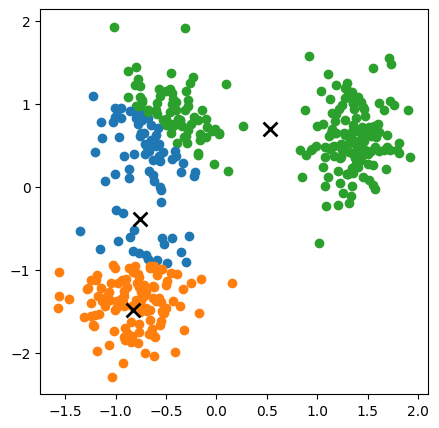

7


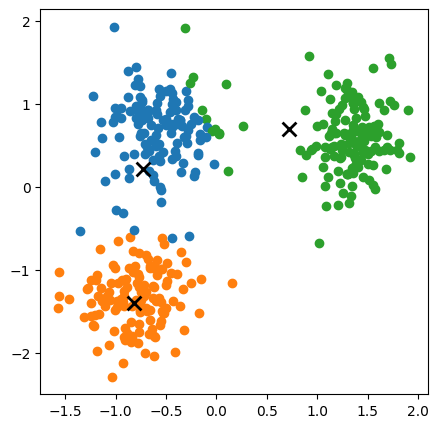

8


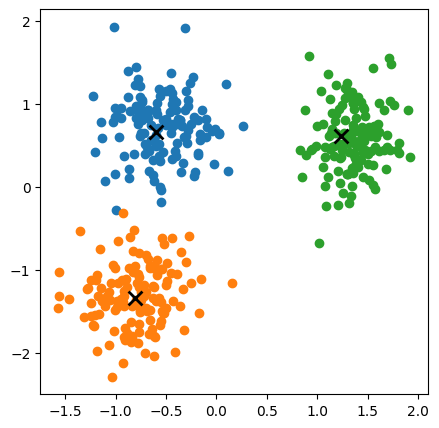

9


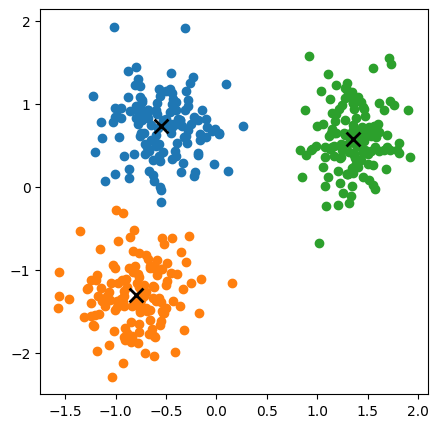

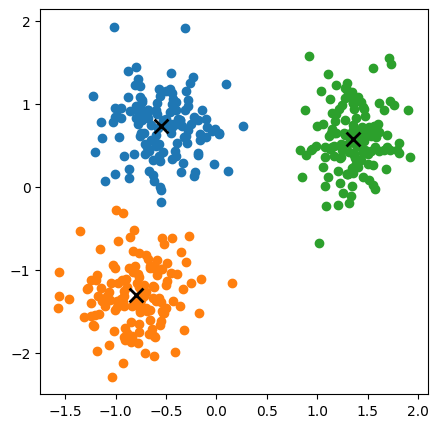

In [149]:
label_pred1, costs1 = kmeans(data1, K1, 50, plot='yes')

In [150]:
adjusted_rand_score(label_true1, label_pred1)

0.9924812518885201

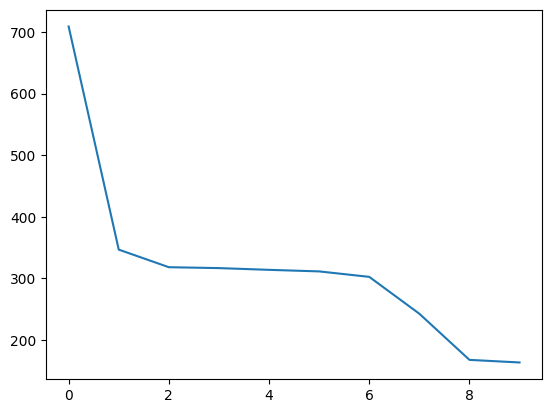

In [155]:
plt.plot(costs1);

In [153]:
label_preds1 = best_kmeans(data1, K1, 50, 50)

       10
       20
       30
       40
       50


In [154]:
adjusted_rand_score(label_true1, label_preds1)

0.9924812518885201

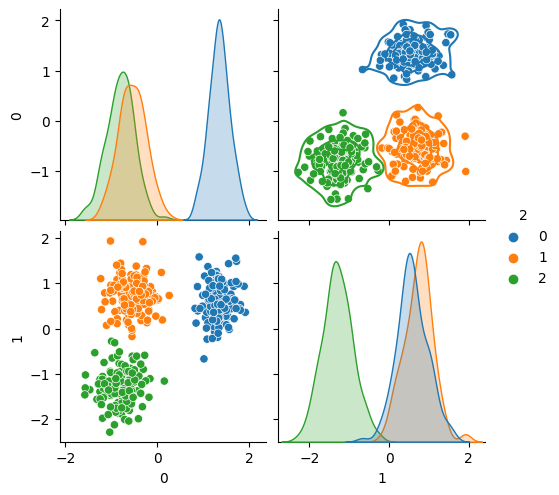

In [157]:
plot_pairplot(data1,label_preds1)

### DATA 2

0


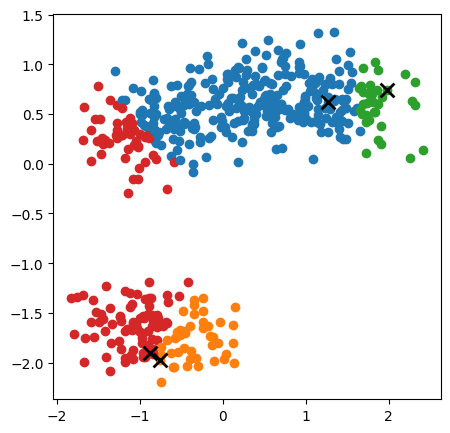

1


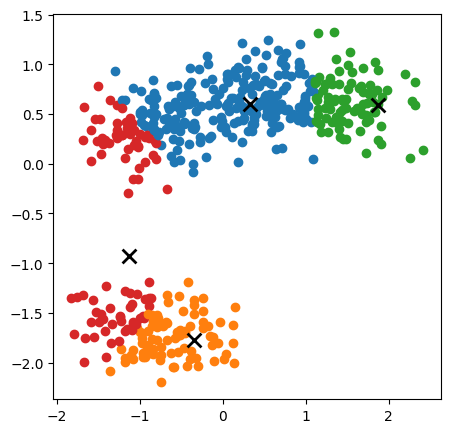

2


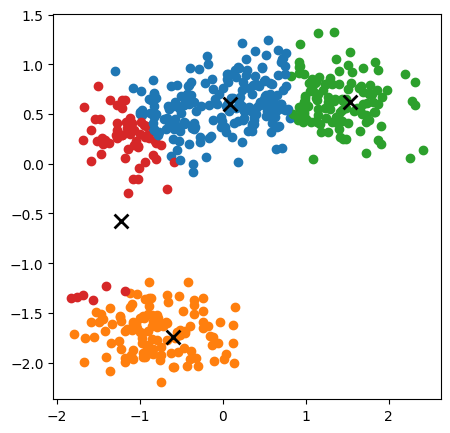

3


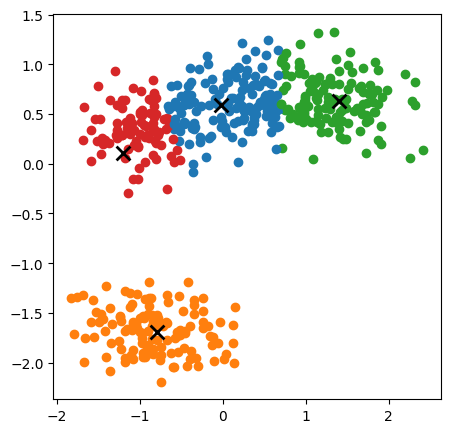

4


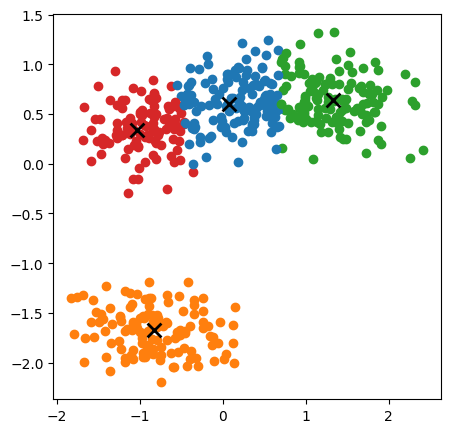

5


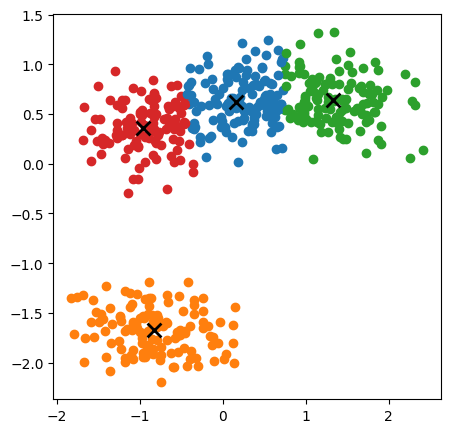

6


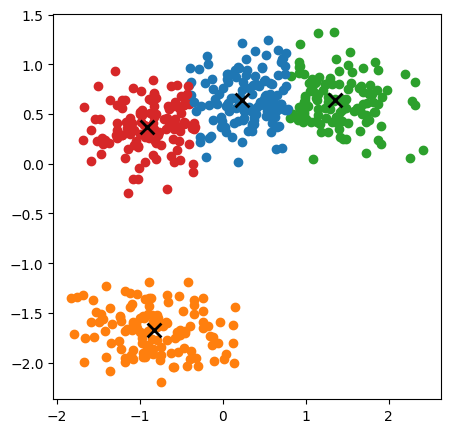

7


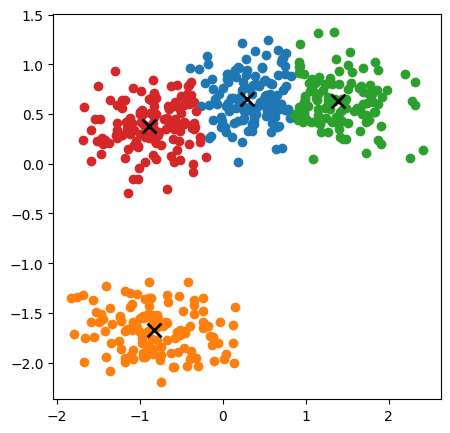

8


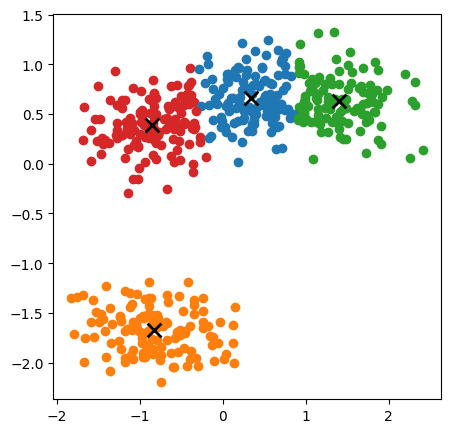

9


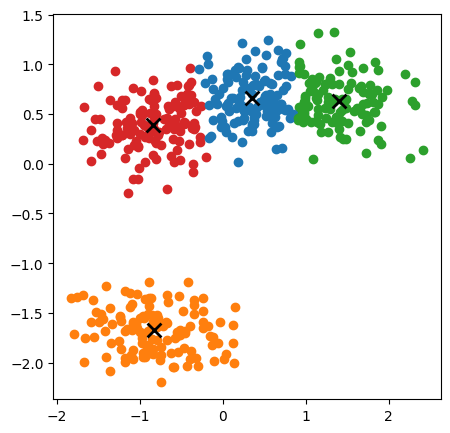

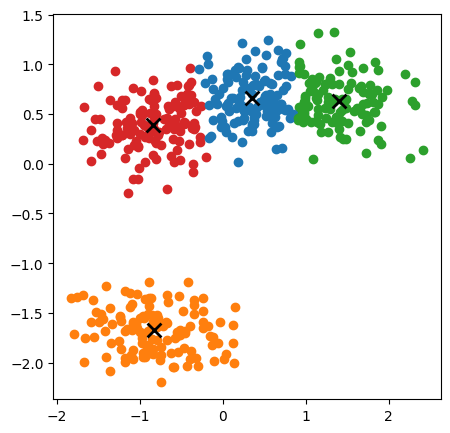

In [159]:
label_pred2, costs2 = kmeans(data2, K2, 50, plot='yes')

In [160]:
adjusted_rand_score(label_true2,label_pred2)

0.7561189091943036

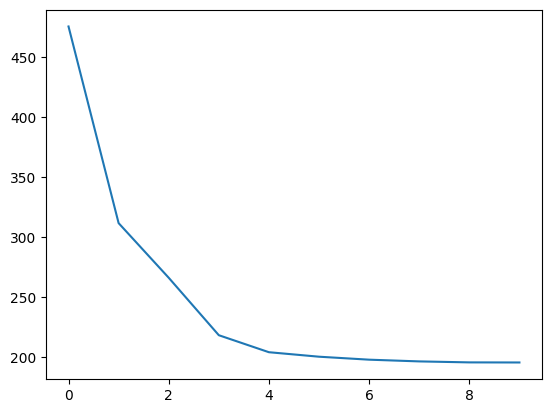

In [161]:
plt.plot(costs2);

In [162]:
label_preds2 = best_kmeans(data2, K2, 50, 50)

       10
       20
       30
       40
       50


In [163]:
adjusted_rand_score(label_true2,label_preds2)

0.7561189091943036

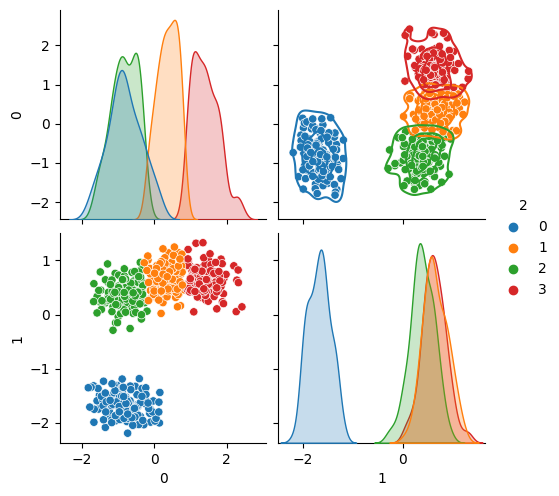

In [164]:
plot_pairplot(data2,label_preds2)

### DATA 3

In [166]:
label_pred3, costs3 = kmeans(data3, K3, 50, plot='no')

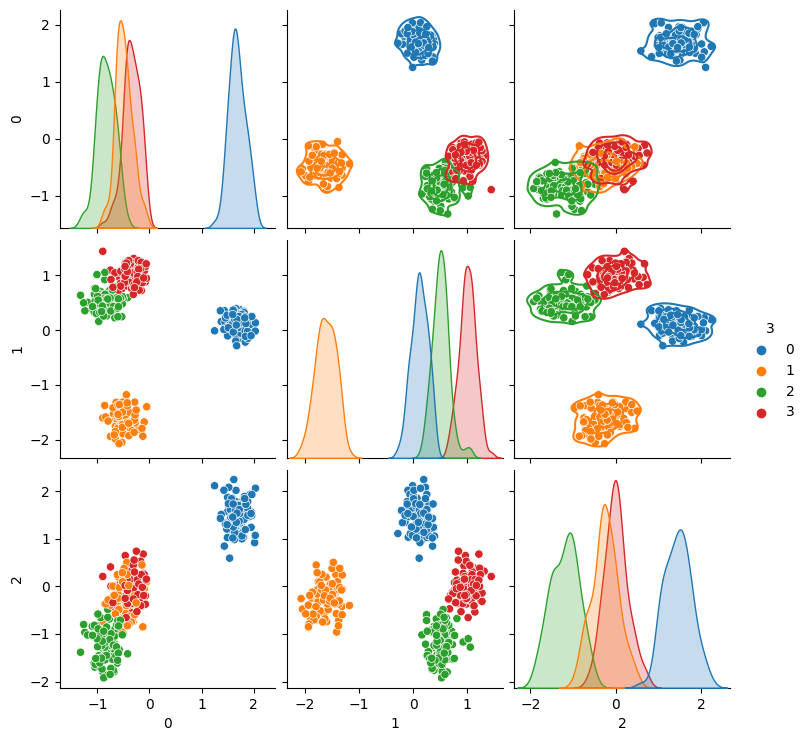

In [172]:
plot_pairplot(data3,label_pred3)

In [169]:
adjusted_rand_score(label_true3, label_pred3)

0.9933165272203728

In [170]:
label_preds3 = best_kmeans(data3, K3, 50, 50)

       10
       20
       30
       40
       50


In [171]:
adjusted_rand_score(label_true3, label_preds3)

0.9933165272203728